In [1]:
absentees = [12, 11, 15, 8, 2, 4, 16, 22, 18, 5, 3, 5, 8, 11, 18, 13, 7, 9, 10, 1]

In [3]:
sum(absentees)/20

9.9

In [4]:
expected_values = [9.9] * 20

In [14]:
## Calculating the test statistic
import numpy as np

o = np.array(absentees)
e = np.array(expected_values)

chi2_s = np.sum((o - e)**2)/9.9
chi2_s

65.23232323232322

In [10]:
from scipy.stats import chisquare, chi2

In [17]:
1 - chi2.cdf(chi2_s, df=19)

5.597101438992169e-07

In [12]:
chisquare(o, e)

Power_divergenceResult(statistic=65.23232323232322, pvalue=5.597101439147934e-07)

In [ ]:
## Conclusion: Since p is less than 0.05, 
## the distribution of absentees is not uniform!!

<AxesSubplot:ylabel='Count'>

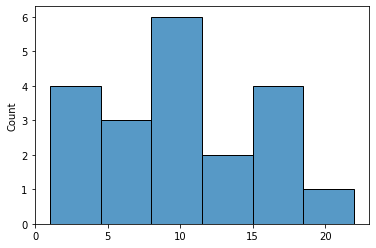

In [13]:
import seaborn as sns
sns.histplot(absentees)

In [20]:
## The goal scoring example
from scipy.stats import binom

possible_goals = [0, 1, 2, 3, 4]
for k in possible_goals:
    print(f"{k} - {binom.pmf(n=4, p=0.4, k=k)}")

0 - 0.24009999999999995
1 - 0.4116000000000001
2 - 0.2646000000000002
3 - 0.07559999999999999
4 - 0.0081


In [26]:
## Expected matches having k goals
ev = []

for k in possible_goals:
    ev.append(binom.pmf(n=4, p=0.3, k=k) * 100)
    print(f"{k} - {binom.pmf(n=4, p=0.3, k=k) * 100}")

ev[3] += ev[4]
ev.pop()
ev

0 - 24.009999999999994
1 - 41.16000000000001
2 - 26.460000000000022
3 - 7.559999999999999
4 - 0.8099999999999999


[24.009999999999994, 41.16000000000001, 26.460000000000022, 8.37]

In [27]:
ov = [26, 34, 30, 10]

In [28]:
chisquare(ov, ev)

Power_divergenceResult(statistic=2.2014921102666785, pvalue=0.5316545318193884)

In [ ]:
## Conclusion: The number of goals scored by the person 
## is binomially distributed with n=4, p=0.3.

In [38]:
from scipy.stats import chi2_contingency
a = [
    [7, 50],
    [9, 19]
]

a = np.array(a)
print(a)

chi2_contingency(a)

[[ 7 50]
 [ 9 19]]


(3.634976963468453,
 0.056577387490966635,
 1,
 array([[10.72941176, 46.27058824],
        [ 5.27058824, 22.72941176]]))

In [42]:
## Conclusion: For an alpha of 0.06, we can reject the null 
## hypothesis and conclude that they are dependent

In [43]:
from scipy.stats import pearsonr

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = [1, 0, 2, 3, 4, 5, 6, 7, 8, 9]

pearsonr(a, b)

(0.9878787878787876, 9.307459988956208e-08)

In [47]:
Day = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Marks = [2, 1, 4, 5, 8, 12, 18, 25, 30, 96]

pearsonr(Day, Marks)

(0.7723324884853583, 0.008837438519581308)

In [48]:
from scipy.stats import f_oneway

chain1 = [7, 7, 6, 5, 3]
chain2 = [8, 9, 7, 6, 9]
chain3 = [9, 7, 8, 10, 8]

f_oneway(chain1, chain2, chain3)
## Reject the null hypothesis because p < 0.05, so at least
## one chain has a different rating.

F_onewayResult(statistic=5.620689655172413, pvalue=0.01894593680954566)